In [1]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [2]:
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import graphviz
# newly import

from matplotlib.colors import ListedColormap, Normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree


from sklearn.metrics import mean_squared_error #MSE
#调用
# mean_squared_error(y_test,y_predict)

# ignore the warning you might get from importing ensemble from sklearn
from sklearn import ensemble

In [3]:
GDRIVE = 'LDR'
FILE_NAME = 'SCA_HLT_50Q_10T.csv'
BASE_PATH = '/Users/xinyu/Desktop/MoNeT_ML'
###############################################################################
# Load dataset
###############################################################################
expPath = path.join(BASE_PATH, GDRIVE, FILE_NAME)
DATA = pd.read_csv(expPath)
print('* Dataset Path: {}'.format(expPath))
print('* Dataset Dimensions: {}'.format(DATA.shape))
DATA.head()

* Dataset Path: /Users/xinyu/Desktop/MoNeT_ML\LDR\SCA_HLT_50Q_10T.csv
* Dataset Dimensions: (997741, 19)


,i_sex,i_ren,i_res,i_rsg,i_gsv,i_fch,i_fcb,i_fcr,i_hrm,i_hrf,i_grp,i_mig,TTI,TTO,WOP,POE,POF,CPT,MNF
0,1,0,0.00,0.000,0.000000e+00,0.000,0.000,0.0,0.0,0.000,0,0.0,1826.0,1826.0,0.0,0.0,1.0,1.000005,0.995371
1,1,1,0.05,0.079,0.000000e+00,0.175,0.117,0.0,1.0,0.956,0,0.0,105.0,403.0,298.5,0.0,1.0,0.720129,0.011812
2,1,1,0.05,0.079,1.000000e-08,0.175,0.117,0.0,1.0,0.956,0,0.0,105.0,403.0,299.0,0.0,1.0,0.720318,0.011814
3,1,1,0.05,0.079,1.000000e-06,0.175,0.117,0.0,1.0,0.956,0,0.0,105.0,403.0,298.0,0.0,1.0,0.720327,0.011880
4,1,1,0.05,0.079,1.000000e-04,0.175,0.117,0.0,1.0,0.956,0,0.0,105.0,402.0,297.5,0.0,1.0,0.720617,0.011890


In [4]:
X = DATA.loc[:, ['i_ren', 'i_res', 'i_rsg', 'i_gsv', 'i_fch', 'i_fcb', 'i_fcr', 'i_hrm', 'i_hrf','i_grp', 'i_mig']] # features i_ren => i_sex_3
#X = pd.concat([X, df_sdr_sca[['i_sex_1', 'i_sex_2', 'i_sex_3']]])
y = DATA.iloc[:, [17]] # index 16 is CPT

In [5]:
X

,i_ren,i_res,i_rsg,i_gsv,i_fch,i_fcb,i_fcr,i_hrm,i_hrf,i_grp,i_mig
0,0,0.00,0.0000,0.000000e+00,0.00000,0.0000,0.00,0.00,0.000,0,0.0
1,1,0.05,0.0790,0.000000e+00,0.17500,0.1170,0.00,1.00,0.956,0,0.0
2,1,0.05,0.0790,1.000000e-08,0.17500,0.1170,0.00,1.00,0.956,0,0.0
3,1,0.05,0.0790,1.000000e-06,0.17500,0.1170,0.00,1.00,0.956,0,0.0
4,1,0.05,0.0790,1.000000e-04,0.17500,0.1170,0.00,1.00,0.956,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
997736,24,1.00,0.1185,1.000000e-02,0.26249,0.1755,0.15,0.75,0.956,0,0.0
997737,24,1.00,0.1185,1.000000e-02,0.26249,0.1755,0.15,0.75,1.000,0,0.0
997738,24,1.00,0.1185,1.000000e-02,0.26249,0.1755,0.15,1.00,0.717,0,0.0
997739,24,1.00,0.1185,1.000000e-02,0.26249,0.1755,0.15,1.00,0.956,0,0.0


In [6]:
y

,CPT
0,1.000005
1,0.720129
2,0.720318
3,0.720327
4,0.720617
...,...
997736,0.011548
997737,0.011160
997738,0.011677
997739,0.010643


In [7]:
# def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# # find combos of interesting features
# interesting_features = ['i_ren', 'i_res']
# combos = powerset(interesting_features)
# combos_list = list(combos)[1:]


# combos_list

# # %%
# # run 5 fold cross validation
# mse_k_fold_no_feat(5, [1], mean_squared_error, X, y, 2021)

# # %%
# for i in range(0, 4):
#     print("yee")

In [8]:
###############################################################################
# Filter to "center" parameters
###############################################################################
fltr = (
    (DATA['i_grp'] == 0)    &
    (DATA['i_sex'] == 1)    &
    np.isclose(DATA['i_fch'], 0.175)    &
    np.isclose(DATA['i_fcb'], 0.117)    &
    np.isclose(DATA['i_fcr'], 0)        &
    np.isclose(DATA['i_hrm'], 1.0)      &
    np.isclose(DATA['i_hrf'], 0.956)    &
    np.isclose(DATA['i_rsg'], 0.079)    &
    np.isclose(DATA['i_gsv'], 1.e-02) 
)
df = DATA[fltr]
df.head()

,i_sex,i_ren,i_res,i_rsg,i_gsv,i_fch,i_fcb,i_fcr,i_hrm,i_hrf,i_grp,i_mig,TTI,TTO,WOP,POE,POF,CPT,MNF
5,1,1,0.05,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,106.0,343.0,237.0,0.0,1.0,0.752805,0.015845
10,1,1,0.10,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,94.0,332.0,238.0,0.0,1.0,0.752316,0.015478
15,1,1,0.15,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,86.0,326.0,239.0,0.0,1.0,0.751914,0.015082
20,1,1,0.20,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,82.0,322.0,240.0,0.0,1.0,0.751660,0.014895
195,1,1,0.25,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,78.0,320.0,242.0,0.0,1.0,0.750713,0.014629


In [9]:
print(df[df['WOP'] == df['WOP'].max()]['WOP'])

329723    569.0
Name: WOP, dtype: float64


<ipython-input-10-b18631c53308>:19: UserWarning: linewidths is ignored by contourf
  ax.contourf(xi, yi, zi, linewidths=.5, alpha=1, cmap='Blues')


<AxesSubplot:xlabel='i_res', ylabel='WOP'>

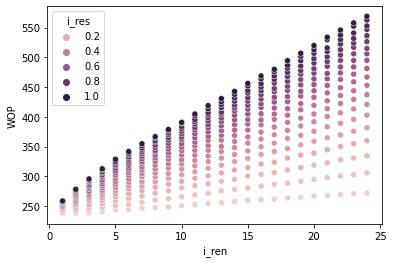

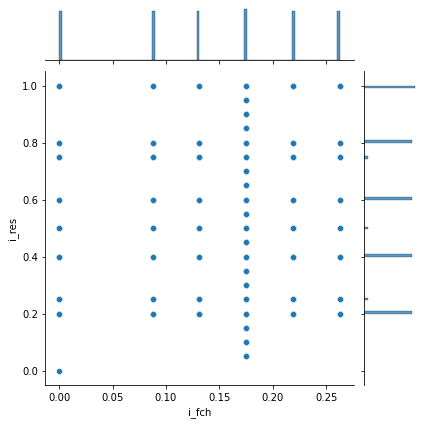

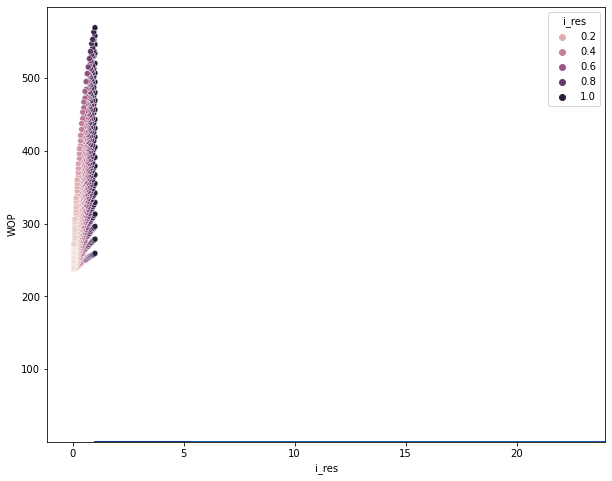

In [10]:
###############################################################################
# Exploration plots
###############################################################################
# Basic scatter plots ---------------------------------------------------------
sns.scatterplot(data=df, x='i_ren', y='WOP', hue='i_res')
# Experiments distributions ---------------------------------------------------
sns.jointplot(data=DATA, x='i_fch', y='i_res')
# Heatmap ---------------------------------------------------------------------
dxy = 1000
(xAx, yAx) = (df['i_ren'], df['i_res'])
xi = np.linspace(min(xAx), max(xAx), dxy)
yi = np.linspace(min(yAx), max(yAx), dxy)
zi = griddata(
    (df['i_ren'], df['i_res']), df['CPT'], 
    (xi[None, :], yi[:, None]), 
    method='linear'
)
(fig, ax) = plt.subplots(figsize=(10, 8))
ax.contourf(xi, yi, zi, linewidths=.5, alpha=1, cmap='Blues')
# %%

# linear relationship between i_res (Size of the weekly releases) and WOP
# WOP => Window of Protection
sns.scatterplot(data=df, x='i_res', y='WOP', hue='i_res')

171
CPT WOP


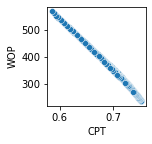

In [11]:
# %%
from itertools import combinations

comb = combinations(df.columns, 2)
print(len(list(comb)))
i = 1
for x, y in comb:
    plt.subplot(2,2,i)
    print(x, y)
    sns.scatterplot(data=df, x=x, y=y)
    i += 1


# %%
interesting_features = ['CPT', 'WOP']
comb = combinations(interesting_features, 2)
i = 1
for x, y in comb:
    plt.subplot(2,3,i)
    print(x, y)
    sns.scatterplot(data=df, x=x, y=y)
    i += 1

In [12]:
def basic_position(pos):
    if pos < (1/3):
        return 'low'
    elif pos < (2/3) and pos >= (1/3) :
        return 'mid'
    return 'high'

DATA['CPTT'] = DATA['CPT'].apply(basic_position)
DATA['CPTT'].value_counts()

low     531813
high    248554
mid     217374
Name: CPTT, dtype: int64

In [13]:
def mse_k_fold_no_feat(k, d_array, mse, X, y, rand_state):
    '''This function will print the d (degree) value that gives the smallest MSE.
    It also returns a dictionary of average MSEs (from k-fold cross validation) across the specified d values
    '''
    
    # 1. Initialize K-Fold CV where k = k
    kf = KFold(n_splits=k, random_state=rand_state, shuffle=True)
    
    # 2. Save the MSEs of each split.
    mses = np.full((k,1),np.nan)
    # above, we're initializing an array where:
    # every row of mses corresponds to one of the folds
    # every column of mses corresponds to one of the possible d values in d_array
    # for example, mses[0,0] corresponds to the mean squared error for the first fold, using d = 1 (the first element of d_array)
    
    fold = 0 # initialize fold value|
    for train_i, val_i in kf.split(X): # this loop iterates through the K folds of our data
        # 2.1 Separate X and Y_obs array into testing and validation sets
        X_fold_train = X.iloc[train_i, :]
        #print(train_i)
        #print("Y SHAPE", y.shape)
        y_fold_train = y[train_i]
        X_fold_val = X.iloc[val_i, :]
        y_fold_val = y[val_i]
        
        # Number of times to train new neural network model per fold
        for i in [1]: # this loop iterates through d values to produce a new model for each d value
            #d = list(d)
            print("LEN of X_FOLD_TRAIN:", X_fold_train.shape, "len of y_fold_train:", y_fold_train.shape)
            X_fold_train_temp = X_fold_train
            X_fold_val_temp = X_fold_val

            # normalize the data
            sc=preprocessing.MinMaxScaler()
            X_fold_train_temp = sc.fit_transform(X_fold_train_temp)

            sc=preprocessing.MinMaxScaler()
            X_fold_val_temp  = sc.fit_transform(X_fold_val_temp)

            # Initialize the model
            model = Sequential()

            # Initialize layers
            num_dim = X_fold_train_temp.shape[1]
            print("Num dim:", num_dim)

            model.add(Dense(30, input_dim=num_dim, activation='relu')) 
            model.add(Dense(5, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            model.fit(X_fold_train_temp, y_fold_train, epochs=1)

            y_pred=model.predict(X_fold_val_temp)
            
            # Save each mse between y_pred and y_fold_val at their respective fold and d value
            mses[fold, i - 1] = mean_squared_error(y_pred, y_fold_val)
        
        fold += 1 # augment the fold count
    
    # 3. Now, find the average of the MSEs for each d value. 
    # Your result should be a dictionary with the same number of elements as d_array.
    # The keys of the dictionary should the the d-values. 
    # Each dictionary value is the average MSE across all k folds associated with its respective key, i.e., the d-value.
    # average_mses = {} # initialize an empty dictionary
    # for i in range(len(d_array)):
    #     average_mses[d_array[i]] = np.mean(mses[:, i]) # For each pass through the loop, add a dictionary entry in which the key is the d-value and the value is the average MSE
    
    # # 4. Find the index of the minimum average MSE
    # min_mse_index = min(average_mses, key=average_mses.get)
    
    # print("Minimum MSE Parameters:", min_mse_index, '\n',
    #       "MSE of {} Parameters:".format(min_mse_index), average_mses[min_mse_index])
    print("AVERAGE MSE (ACROSS ALL FOLDS: ", np.mean(mses))
    return mses

In [14]:
def gini_impurity(labels):
    counts = np.unique(labels, return_counts = True)[1]
    proportions = counts / sum(counts)
    return 1 - np.sum(proportions ** 2)

print("CPT:", gini_impurity(DATA['CPT']))
print("WOP:", gini_impurity(DATA['WOP']))
print("i_res:", gini_impurity(DATA['i_res']))
print("i_sex:", gini_impurity(DATA['i_sex']))

print("i_ren:", gini_impurity(DATA['i_ren']))
print("i_fch:", gini_impurity(DATA['i_fch']))
print("i_rsg:", gini_impurity(DATA['i_rsg']))
print("i_gsv:", gini_impurity(DATA['i_gsv']))

CPT: 0.9999989977358854
WOP: 0.9917495223799683
i_res: 0.8193031591104767
i_sex: 0.6666666666659969
i_ren: 0.8499856956993155
i_fch: 0.8333001105012836
i_rsg: 0.7468540265553845
i_gsv: 0.7498805816063492


In [15]:
#cross validation just for training tests(50/50)
#k fold
df_train, df_test= train_test_split(DATA, test_size=0.5, random_state=100)
df_train = DATA.sort_values(by='CPT')
df_test = DATA.sort_values(by='CPT')
df_test

,i_sex,i_ren,i_res,i_rsg,i_gsv,i_fch,i_fcb,i_fcr,i_hrm,i_hrf,i_grp,i_mig,TTI,TTO,WOP,POE,POF,CPT,MNF,CPTT
551168,2,16,1.0,0.0790,0.01,0.00000,0.17550,0.15,1.00,1.000,0,0.0,25.0,1826.0,1801.0,1.0,0.0,0.008647,0.000000,low
659399,2,24,1.0,0.0395,0.01,0.00000,0.11700,0.15,1.00,1.000,0,0.0,25.0,1826.0,1801.0,1.0,0.0,0.008649,0.000000,low
604005,2,20,1.0,0.0395,0.01,0.00000,0.17550,0.15,1.00,1.000,0,0.0,25.0,1826.0,1801.0,1.0,0.0,0.008649,0.000000,low
603987,2,20,1.0,0.0395,0.01,0.00000,0.14625,0.15,1.00,1.000,0,0.0,25.0,1826.0,1801.0,1.0,0.0,0.008649,0.000000,low
493145,2,12,1.0,0.0395,0.01,0.00000,0.17550,0.15,1.00,1.000,0,0.0,25.0,1826.0,1801.0,1.0,0.0,0.008650,0.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,1,4,0.2,0.1185,0.01,0.26249,0.00000,0.00,0.75,0.717,0,0.0,1826.0,1826.0,0.0,0.0,1.0,0.929682,0.264534,high
10553,1,4,0.2,0.0790,0.01,0.26249,0.00000,0.00,0.75,0.717,0,0.0,1826.0,1826.0,0.0,0.0,1.0,0.929683,0.264545,high
7960,1,4,0.2,0.0395,0.01,0.26249,0.00000,0.00,0.75,0.717,0,0.0,1826.0,1826.0,0.0,0.0,1.0,0.929728,0.264845,high
5368,1,4,0.2,0.0000,0.01,0.26249,0.00000,0.00,0.75,0.717,0,0.0,1826.0,1826.0,0.0,0.0,1.0,0.929746,0.264656,high


In [16]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=42, criterion = 'gini')
# decision_tree_model.fit(df_train[['i_ren', 'i_res']], df_train['CPTT'])

In [17]:
# sns.scatterplot(data = DATA, x = x_train, y = y_train, hue = 'CPTT')

In [18]:
# xx, yy = np.meshgrid(np.arange(0, 25, 0.02), np.arange(0, 1.1, 0.002))
# Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
# categories, Z_int = np.unique(Z_string, return_inverse = True)
# Z_int = Z_int.reshape(xx.shape)
# plt.contourf(xx, yy, Z_int)
# sns.scatterplot(data = df_train, x = 'i_ren', y = 'i_res', hue = 'CPTT')
# plt.title('Decision Tree on df_train_version1')

In [19]:
decision_tree_model.fit(df_train[['i_fch', 'i_res']], df_train['CPTT'])

DecisionTreeClassifier(random_state=42)

Text(0.5, 1.0, 'Decision Tree on df_train_version2')

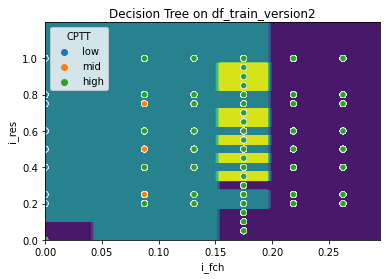

In [20]:
xx, yy = np.meshgrid(np.arange(0, 0.3, 0.005), np.arange(0, 1.2, 0.002))
Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int)
sns.scatterplot(data = df_train, x = 'i_fch', y = 'i_res', hue = 'CPTT')
plt.title('Decision Tree on df_train_version2')

In [21]:
dt_training_accuracy = decision_tree_model.score(df_train[['i_ren', 'i_res']], df_train['CPTT'])
dt_test_accuracy = decision_tree_model.score(df_test[['i_ren', 'i_res']], df_test['CPTT'])
dt_training_accuracy, dt_test_accuracy

(0.24911675474897793, 0.24911675474897793)

In [22]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_model.fit(df_train[['i_ren', 'i_res']], df_train['CPTT'])

RandomForestClassifier(n_estimators=20, random_state=42)

C:\Users\xinyu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


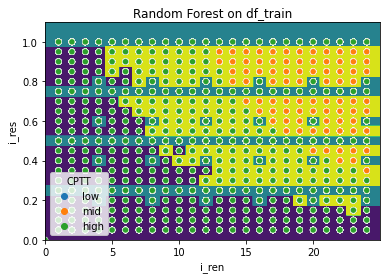

In [23]:
xx, yy = np.meshgrid(np.arange(0, 25, 0.02), np.arange(0, 1.1, 0.002))
Z_string = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int)
sns.scatterplot(data = df_train, x = 'i_ren', y = 'i_res', hue = 'CPTT')
plt.title('Random Forest on df_train');

In [24]:
#### USE CPT for goal and split it w/ low mid high 
#### standard scaler mean max 
#   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
##### max depth 20 
#

In [25]:
type(df['WOP'].max())

float

In [26]:
def basic_position(wop_value):
    if wop_value < (df['WOP'].max()/3):
        return 'low'
    elif wop_value < (df['WOP'].max() * 2/3) and wop_value >= (df['WOP'].max() * 1/3) :
        return 'med'
    return 'high'

df['WOPP'] = df['WOP'].apply(basic_position)
df['WOPP'].value_counts()

<ipython-input-26-aeedc7713f91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WOPP'] = df['WOP'].apply(basic_position)


med     305
high    175
Name: WOPP, dtype: int64

In [27]:
df_train, df_test= train_test_split(df, test_size=0.5, random_state=100)
df_train = df.sort_values(by='WOP')
df_test = df.sort_values(by='WOP')
df_test

,i_sex,i_ren,i_res,i_rsg,i_gsv,i_fch,i_fcb,i_fcr,i_hrm,i_hrf,i_grp,i_mig,TTI,TTO,WOP,POE,POF,CPT,MNF,WOPP
5,1,1,0.05,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,106.0,343.0,237.0,0.0,1.0,0.752805,0.015845,med
10,1,1,0.10,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,94.0,332.0,238.0,0.0,1.0,0.752316,0.015478,med
961,1,2,0.05,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,95.0,333.0,238.0,0.0,1.0,0.752289,0.015429,med
15,1,1,0.15,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,86.0,326.0,239.0,0.0,1.0,0.751914,0.015082,med
1917,1,3,0.05,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,89.0,328.5,239.5,0.0,1.0,0.751803,0.015166,med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279799,1,23,0.95,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,32.0,584.5,552.5,0.0,1.0,0.594123,0.000006,high
322206,1,24,0.90,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,33.0,586.0,553.0,0.0,1.0,0.593228,0.000006,high
279974,1,23,1.00,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,32.0,590.0,558.0,0.0,1.0,0.590515,0.000006,high
322211,1,24,0.95,0.079,0.01,0.175,0.117,0.0,1.0,0.956,0,0.0,32.0,595.0,563.0,0.0,1.0,0.588371,0.000004,high


In [28]:
decision_tree_model.fit(df_train[['i_ren', 'i_res']], df_train['WOPP'])

DecisionTreeClassifier(random_state=42)

Text(0.5, 1.0, 'Decision Tree on df_train')

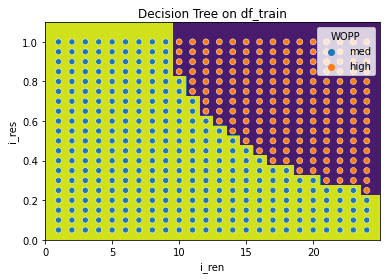

In [29]:
xx, yy = np.meshgrid(np.arange(0, 25, 0.02), np.arange(0, 1.1, 0.002))
Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int)
sns.scatterplot(data = df_train, x = 'i_ren', y = 'i_res', hue = 'WOPP')
plt.title('Decision Tree on df_train')